In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Business_Analytics_Dataset_10000_Rows.csv")
print(df.head())

   Order_ID Customer_ID  Order_Date Region Product_Category Customer_Segment  \
0         1    CUST3818  2024-08-18  North         Clothing        Corporate   
1         2    CUST9689  2024-06-19  South           Beauty      Home Office   
2         3    CUST9147  2024-11-21   West           Sports        Corporate   
3         4    CUST7938  2024-07-19  North         Clothing         Consumer   
4         5    CUST5127  2024-10-28  South   Home & Kitchen         Consumer   

   Quantity  Unit_Price  Discount_Rate  Revenue     Cost  Profit  \
0         5      300.68           0.27  1097.48   768.29  329.19   
1         9       32.89           0.02   290.09   179.33  110.76   
2         5      345.61           0.25  1296.04  1022.60  273.44   
3         1      444.50           0.06   417.83   280.99  136.84   
4         5       65.13           0.21   257.26   151.90  105.36   

  Payment_Method  
0    Credit Card  
1     Debit Card  
2    Credit Card  
3            UPI  
4    Credit Car

In [3]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  int64  
 1   Customer_ID       10000 non-null  str    
 2   Order_Date        10000 non-null  str    
 3   Region            10000 non-null  str    
 4   Product_Category  10000 non-null  str    
 5   Customer_Segment  10000 non-null  str    
 6   Quantity          10000 non-null  int64  
 7   Unit_Price        10000 non-null  float64
 8   Discount_Rate     10000 non-null  float64
 9   Revenue           10000 non-null  float64
 10  Cost              10000 non-null  float64
 11  Profit            10000 non-null  float64
 12  Payment_Method    10000 non-null  str    
dtypes: float64(5), int64(2), str(6)
memory usage: 1015.8 KB
None


In [5]:
print(df.columns)

Index(['Order_ID', 'Customer_ID', 'Order_Date', 'Region', 'Product_Category',
       'Customer_Segment', 'Quantity', 'Unit_Price', 'Discount_Rate',
       'Revenue', 'Cost', 'Profit', 'Payment_Method'],
      dtype='str')


In [6]:
print(df.describe())

          Order_ID     Quantity    Unit_Price  Discount_Rate       Revenue  \
count  10000.00000  10000.00000  10000.000000   10000.000000  10000.000000   
mean    5000.50000      5.51430    255.505222       0.150272   1195.241948   
std     2886.89568      2.86451    140.832874       0.086818    979.590244   
min        1.00000      1.00000     10.000000       0.000000      8.590000   
25%     2500.75000      3.00000    132.777500       0.080000    396.300000   
50%     5000.50000      5.00000    254.995000       0.150000    924.365000   
75%     7500.25000      8.00000    377.892500       0.230000   1775.840000   
max    10000.00000     10.00000    499.940000       0.300000   4972.100000   

               Cost        Profit  
count  10000.000000  10000.000000  
mean     776.292180    418.949768  
std      651.473171    368.418447  
min        5.740000      1.970000  
25%      255.592500    131.785000  
50%      595.480000    311.395000  
75%     1141.332500    606.845000  
max     3

In [19]:
print(df.groupby('Payment_Method')['Revenue'].sum())

Payment_Method
Cash on Delivery    2412310.37
Credit Card         2356673.37
Debit Card          2473292.21
Net Banking         2307448.77
UPI                 2402694.76
Name: Revenue, dtype: float64


In [20]:
print(df.columns)

Index(['Order_ID', 'Customer_ID', 'Order_Date', 'Region', 'Product_Category',
       'Customer_Segment', 'Quantity', 'Unit_Price', 'Discount_Rate',
       'Revenue', 'Cost', 'Profit', 'Payment_Method'],
      dtype='str')


In [21]:
print(df['Product_Category'].value_counts())

Product_Category
Clothing          2008
Home & Kitchen    2008
Sports            1997
Beauty            1996
Electronics       1991
Name: count, dtype: int64


In [22]:
print(df['Customer_Segment'].value_counts())

Customer_Segment
Home Office    3389
Corporate      3316
Consumer       3295
Name: count, dtype: int64


In [23]:
print(df.groupby('Product_Category')['Revenue'].sum())

Product_Category
Beauty            2427867.16
Clothing          2333518.14
Electronics       2433318.37
Home & Kitchen    2377096.07
Sports            2380619.74
Name: Revenue, dtype: float64


In [24]:
print(df.groupby('Customer_Segment')['Profit'].sum())

Customer_Segment
Consumer       1392831.22
Corporate      1400460.21
Home Office    1396206.25
Name: Profit, dtype: float64


In [25]:
print(df.isnull().sum())

Order_ID            0
Customer_ID         0
Order_Date          0
Region              0
Product_Category    0
Customer_Segment    0
Quantity            0
Unit_Price          0
Discount_Rate       0
Revenue             0
Cost                0
Profit              0
Payment_Method      0
dtype: int64


In [28]:
print(df.dtypes)

Order_ID                     int64
Customer_ID                    str
Order_Date          datetime64[us]
Region                         str
Product_Category               str
Customer_Segment               str
Quantity                     int64
Unit_Price                 float64
Discount_Rate              float64
Revenue                    float64
Cost                       float64
Profit                     float64
Payment_Method                 str
dtype: object


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
print(df['Order_Date'])

datetime64[us]


In [29]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

In [31]:
print(df['Order_Date'].dtype)

datetime64[us]


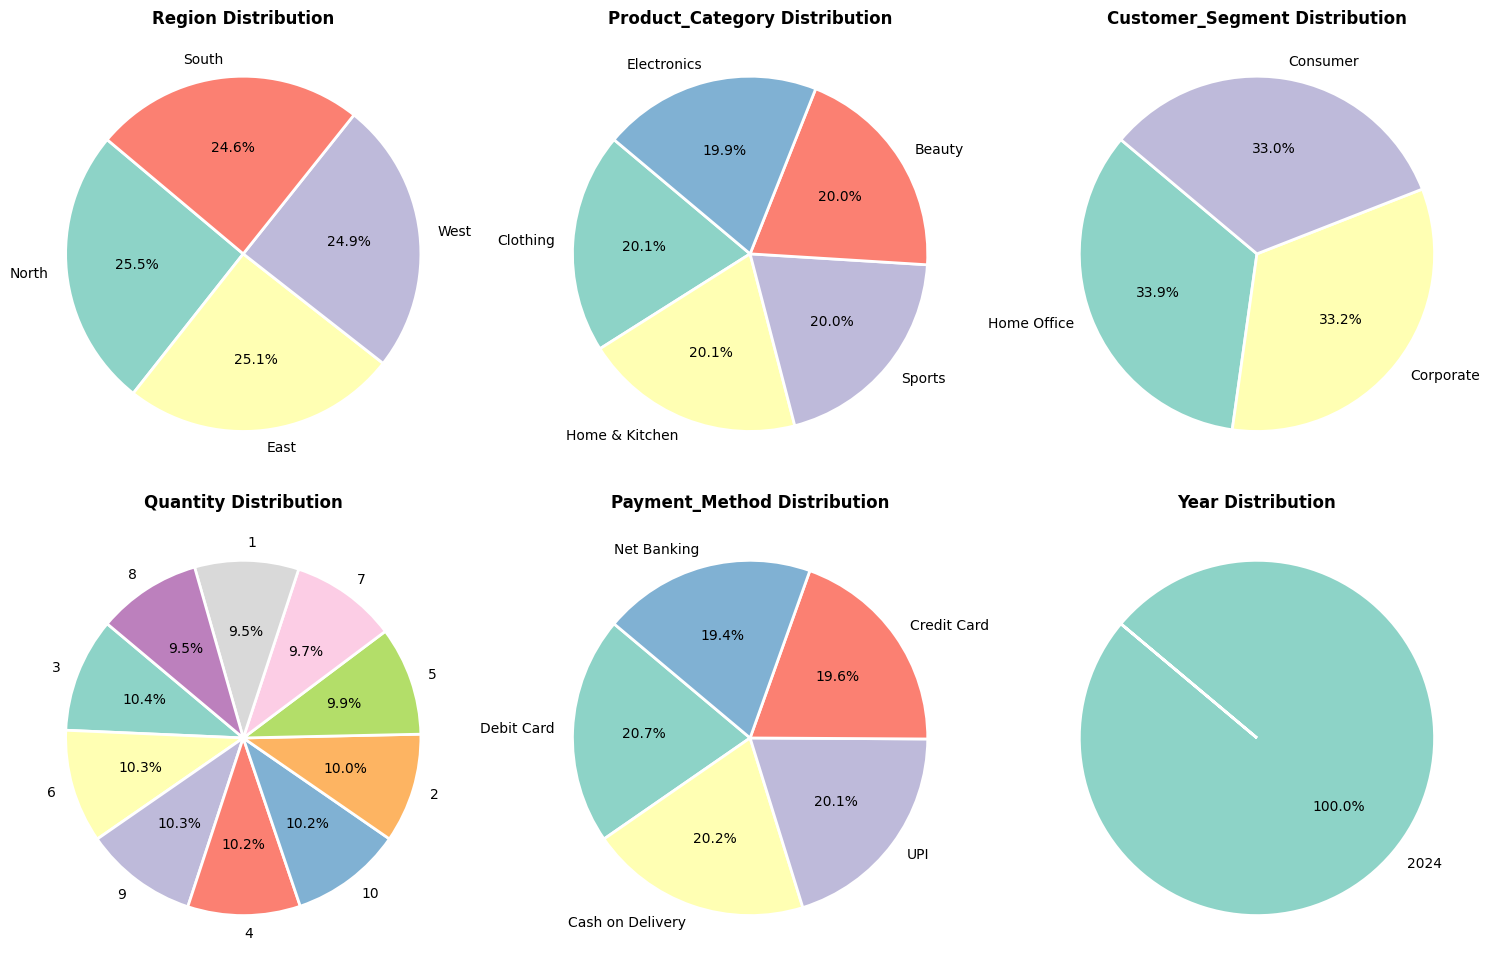

In [40]:
import math

def plot_all_pie(df,title_prefix=""):
    pie_cols = [col for col in df.columns if df[col].nunique() <= 10]

    n_cols = 3
    n_rows = math.ceil(len(pie_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,5*n_rows))

    for i,col in enumerate(pie_cols,1):
        plt.subplot(n_rows,n_cols,i)
        
        data = df[col].value_counts()

        plt.pie(data,
                labels=data.index,
                autopct='%1.1f%%',
                startangle=140,
                colors = sns.color_palette('Set3'),
                wedgeprops={'edgecolor':'white','linewidth':2}
            )
        
        plt.title(f"{title_prefix}{col} Distribution",fontsize=12,fontweight='bold')
        plt.tight_layout()

plot_all_pie(df)


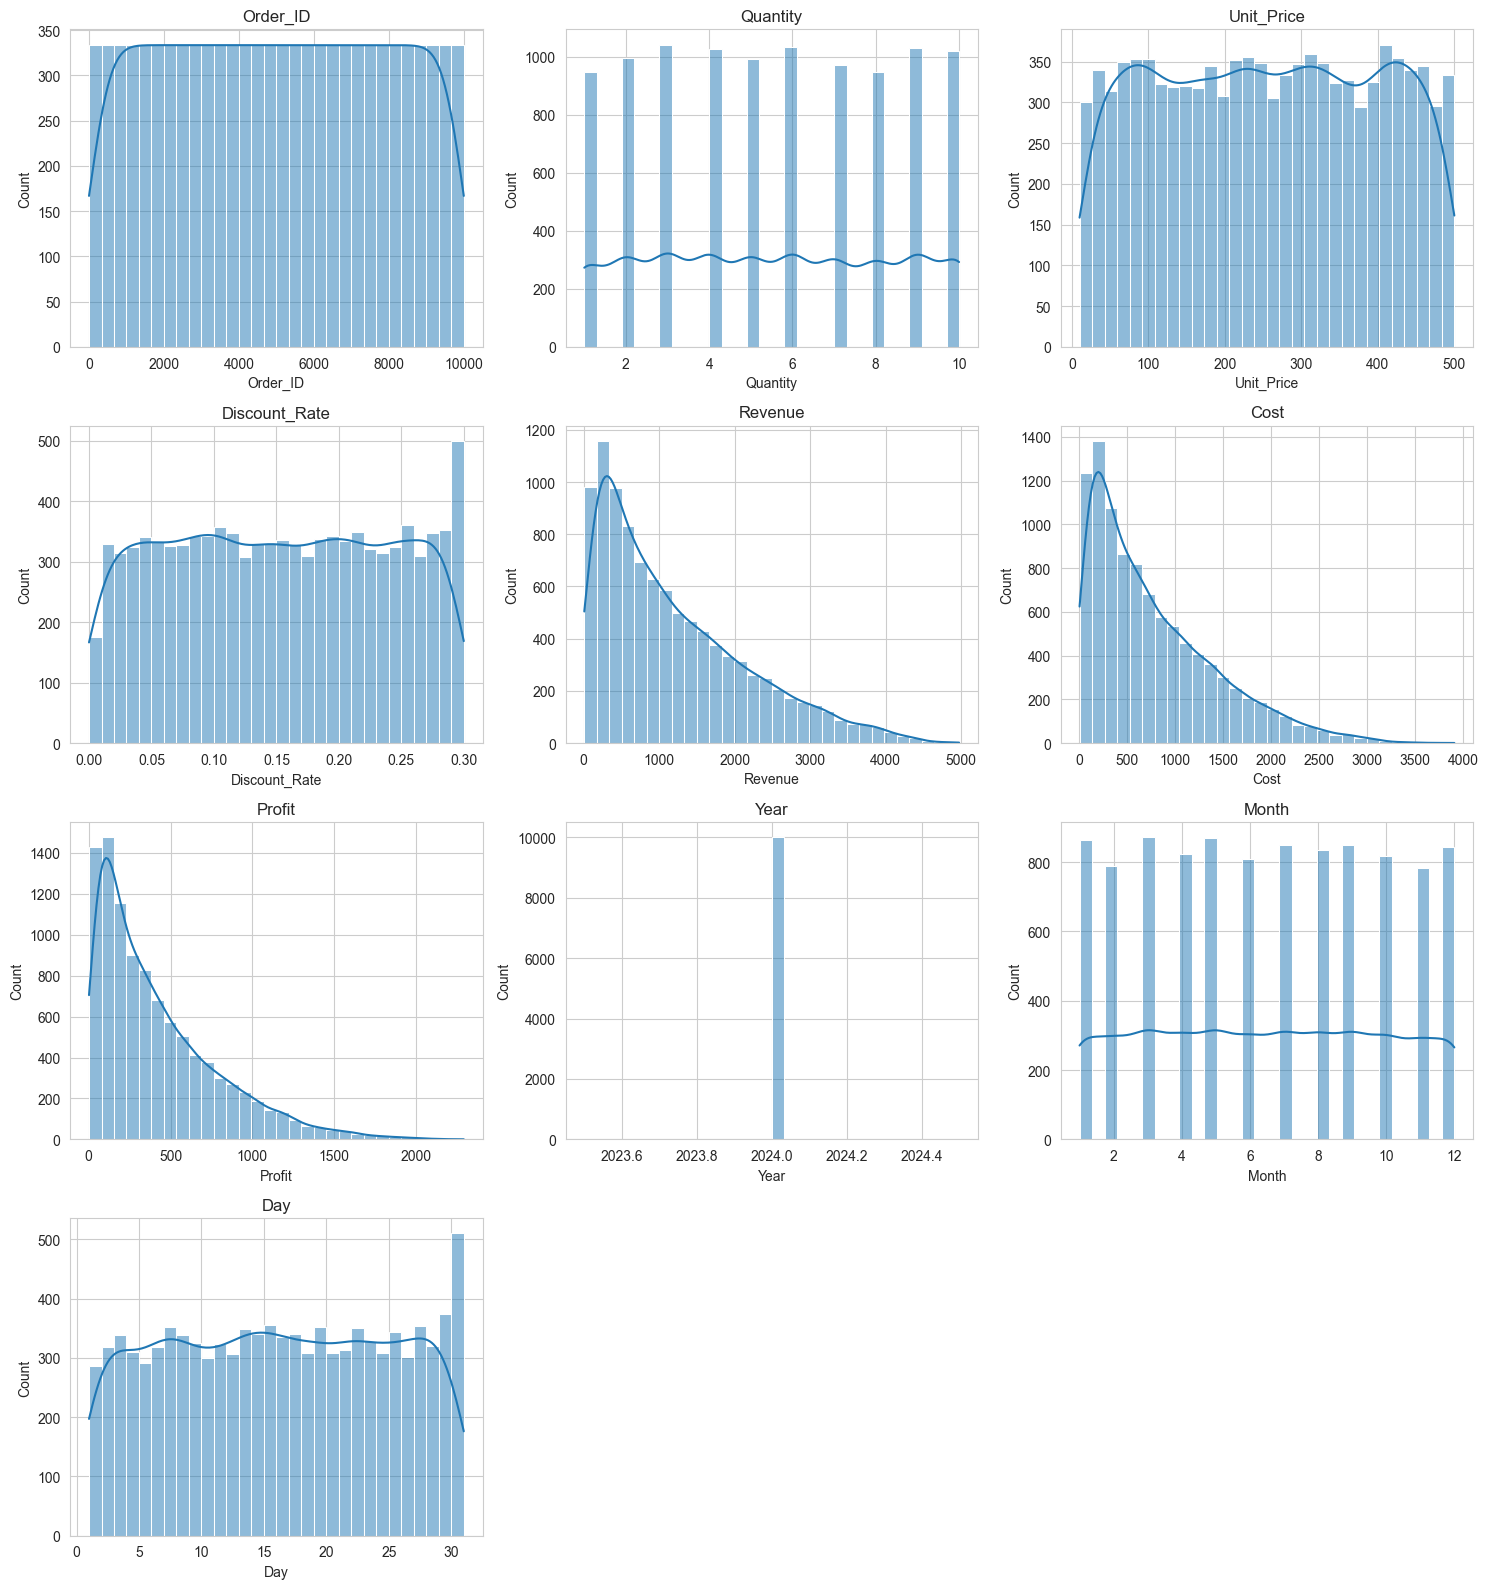

In [52]:
def plot_all_hist(df,title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,4*n_rows))
    for i,col in enumerate(num_cols,1):
        plt.subplot(n_rows,n_cols,i)
        sns.histplot(df[col],kde=True,bins=30)
        plt.title(f"{title_prefix}{col}")

    plt.tight_layout()
    plt.show()

plot_all_hist(df)


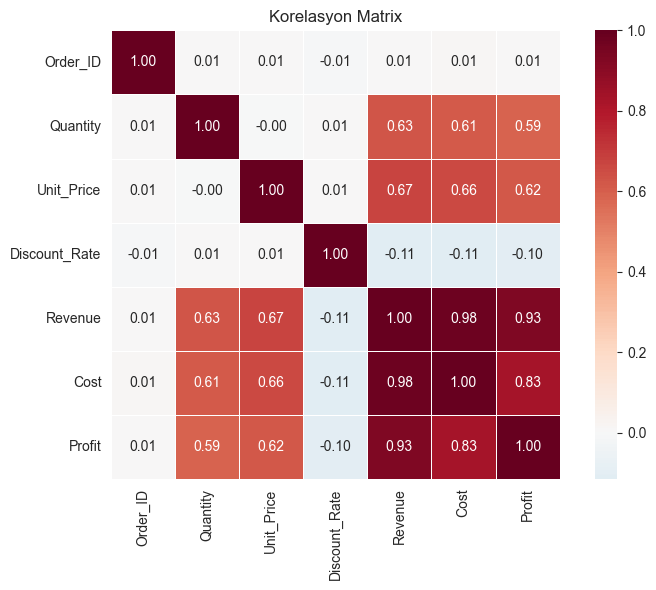


 Highest Correlations with Profit:
Revenue          0.929501
Cost             0.832131
Unit_Price       0.623346
Quantity         0.587836
Order_ID         0.008100
Discount_Rate   -0.103951
Name: Profit, dtype: float64


In [53]:
num_cols = df.select_dtypes(include=['int64','float']).columns.tolist()

corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='RdBu_r',center=0,fmt='.2f',square=True,linewidths=0.5,vmax=1)

plt.title('Korelasyon Matrix')
plt.tight_layout()
plt.show()

print("\n Highest Correlations with Profit:")
print(corr['Profit'].drop('Profit').sort_values(ascending=False))

  Order_ID             =>     0 outlier (%0.0)
  Quantity             =>     0 outlier (%0.0)
  Unit_Price           =>     0 outlier (%0.0)
  Discount_Rate        =>     0 outlier (%0.0)
  Revenue              =>   153 outlier (%1.5)
  Cost                 =>   218 outlier (%2.2)
  Profit               =>   291 outlier (%2.9)


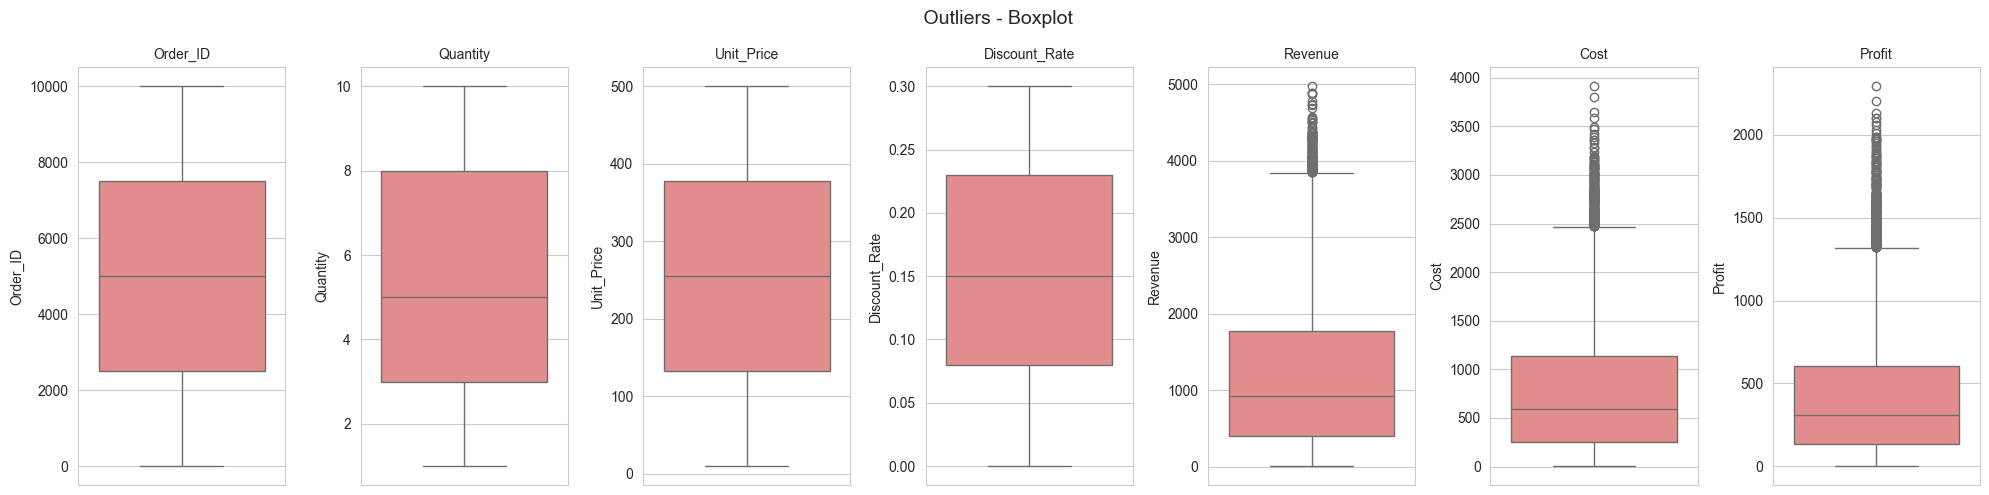

In [57]:
def find_outliers_iqr(series,threshold=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1

    lower = q1-threshold * iqr
    upper = q3+threshold * iqr

    outliers = series[(series < lower) | (series > upper)]

    count = outliers.shape[0]
    pct = 100 * count / series.shape[0]

    return count,pct

for col in num_cols:
    count, pct = find_outliers_iqr(df[col])
    print(f"  {col:20s} => {count:5d} outlier (%{pct:.1f})")

fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col, fontsize=10)
plt.suptitle(' Outliers - Boxplot', fontsize=14)
plt.tight_layout()
plt.show()